In [9]:
# Importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from skimage import io, transform

/home/jantina/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [43]:
def crop_patch(image, y, x, size=112):
    """Given an image, and a Y, X location, this function will extract the patch. 
        Default patch size is 112 x 112"""

    patch = image[abs(size - y) : abs(size + y), abs(size - x) : abs(size + x), :]
    
    return patch

In [44]:
def check_dimensions(image, y, x, size=112):
    """Before a patch is extracted from an image, check to make sure that it will not
        extend pass the dimensions of the image."""
    
    # Get the dimensions of the image first, then check to make sure the patch that would be
    # extacted doesn't over-extend the boundaries of the image.
    height, width = image.shape[0:2]
    
    if(x + (size//2) > width or x - (size//2) < 0 or y + (size//2) > height or y - (size//2) < 0):
        return False
    else:
        return True

In [4]:
def create_patches(img, percent, offset=112):
    """Given an image, this function will extract patches from it in a uniform grid. To increase the
        density of the grid, increase the percentage of pixel-indices that should be sampled."""

    # Create a grid of points to extract patches from, use the percent variable to 
    # vary the density.
    num_points = int((img.shape[0] * img.shape[1]) * percent)
    density = int(np.sqrt(num_points)) 

    x_, y_ = np.meshgrid(np.linspace(offset, img.shape[1] - offset, int(density)), 
                         np.linspace(offset, img.shape[0] - offset, int(density)))

    xy = np.dstack([x_, y_]).reshape(-1, 2).astype(int)
    
    # Filter out points that exceed the extent of the image
    sparse_points = [p.tolist() for p in xy if check_dimensions(image, p[1], p[0])]
        
    # Extract the patches 
    patches = [crop_patch(img, point[1], point[0]) for point in sparse_points]
    
    print("Number of patches: ", len(patches))
    
    return np.array(sparse_points), patches

(3000, 4000, 3)


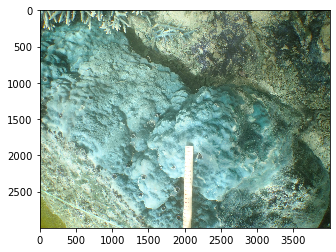

In [16]:
# Create patches for single image

os.chdir("/data/jantina/CoralNet/WAPA_RFM")

# Prepare annotations
annotations = pd.read_csv('annotations.csv')
img_names = annotations.iloc[:, 0]
landmarks = annotations.iloc[:, 1:4]

# Prepare labels as dictionary
# Using numbers from 1 -> N-1
labels = pd.read_csv('labelset.csv')["Short Code"]
labels.index = labels.index + 1
labels = labels.to_dict()

# Take a single image
img_name = "2020-08-07-ADELUP-B-T3 2.5-B (P8072737).JPG"
landmark = landmarks.iloc[img_names[img_names==img_name].index.values]
landmark = np.asarray(landmark)

image = io.imread(os.path.join('images', img_name))
print(image.shape)

# Get image information
height = image.shape[0]
width = image.shape[1]
colors = image.shape[2]

# Create array with coordinates and label code
classes = np.copy(landmark) 
for new, old in labels.items():
    classes[landmark == old] = new
    
plt.imshow(image)

(224, 172, 3)


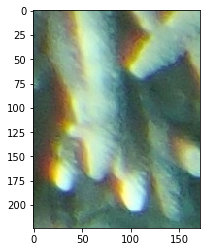

In [50]:
if check_dimensions:
    patch = crop_patch(image, classes[0][0], classes[0][1])
    print(patch.shape)
    plt.imshow(patch)

In [49]:
classes

array([[181, 86, 13],
       [441, 1015, 101],
       [38, 1348, 13],
       [343, 1329, 118],
       [538, 1869, 118],
       [139, 1724, 120],
       [159, 3126, 37],
       [527, 2609, 37],
       [132, 2807, 37],
       [431, 3495, 37],
       [544, 3295, 37],
       [1024, 424, 101],
       [1160, 2365, 101],
       [906, 2704, 37],
       [645, 3189, 118],
       [707, 2797, 37],
       [1635, 895, 101],
       [1610, 971, 101],
       [1794, 2000, 101],
       [1379, 2766, 37],
       [1509, 2597, 101],
       [1326, 3854, 118],
       [1272, 3334, 37],
       [2114, 411, 37],
       [1889, 1501, 101],
       [1851, 1148, 101],
       [1929, 2011, 126],
       [2049, 1764, 101],
       [2219, 1859, 101],
       [2175, 1762, 101],
       [1869, 2974, 37],
       [1871, 2902, 37],
       [1882, 3341, 37],
       [2158, 3678, 37],
       [1840, 3853, 120],
       [2357, 3962, 37],
       [2115, 3480, 37],
       [1852, 3368, 37],
       [2842, 355, 37],
       [2430, 1259, 101],
  